/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


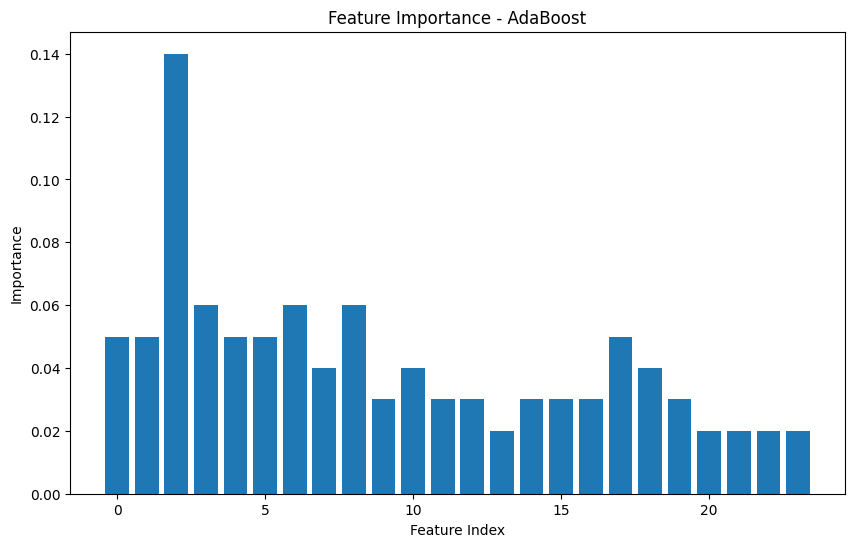

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

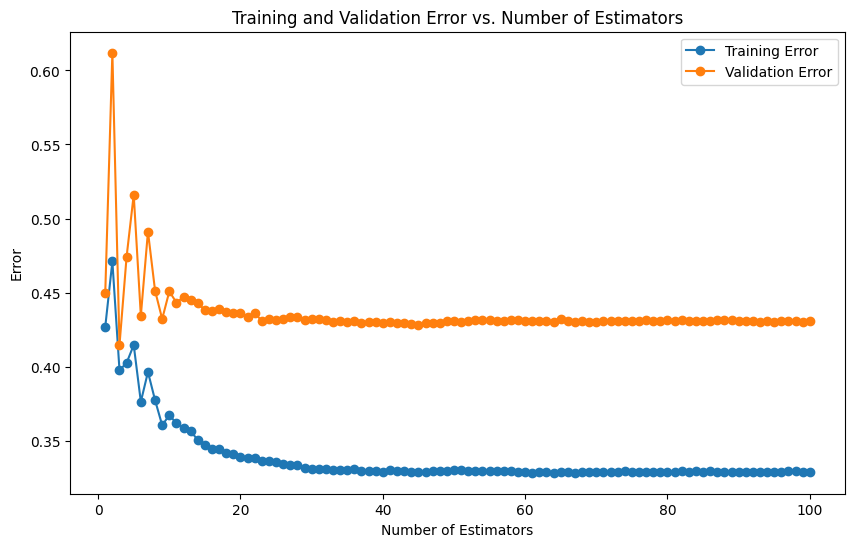

{'Accuracy': 0.5691130266655925,
 'Precision': 0.3263070996147496,
 'Recall': 0.2901962703734521,
 'F1 Score': 0.30719411414212067,
 'Confusion Matrix': array([[29393, 12241],
        [14502,  5929]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n       False       0.67      0.71      0.69     41634\n        True       0.33      0.29      0.31     20431\n\n    accuracy                           0.57     62065\n   macro avg       0.50      0.50      0.50     62065\nweighted avg       0.56      0.57      0.56     62065\n'}

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('depression_data.csv')

# Drop irrelevant columns if necessary
if 'Name' in data.columns:
    data = data.drop(columns=['Name'])

# One-hot encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Separate features and target
X = data_encoded.drop('Chronic Medical Conditions_Yes', axis=1)
y = data_encoded['Chronic Medical Conditions_Yes']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Initialize AdaBoost with Decision Tree as the base estimator
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),  # Updated argument name
    n_estimators=100,
    random_state=42
)

# Train the AdaBoost model
ada_model.fit(X_train_balanced_scaled, y_train_balanced)

# Predict on the validation set
y_val_pred = ada_model.predict(X_val_scaled)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)

# Plot feature importance
feature_importance = ada_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.title('Feature Importance - AdaBoost')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

# Initialize training and validation error trackers
train_errors, val_errors = [], []

# Iterate over a range of n_estimators
for n_estimators in range(1, 101):
    ada_temp = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1, random_state=42),  # Updated to 'estimator'
        n_estimators=n_estimators,
        random_state=42
    )
    # Fit AdaBoost to the training data
    ada_temp.fit(X_train_balanced_scaled, y_train_balanced)

    # Calculate training and validation errors
    y_train_pred = ada_temp.predict(X_train_balanced_scaled)
    y_val_pred = ada_temp.predict(X_val_scaled)
    train_errors.append(1 - accuracy_score(y_train_balanced, y_train_pred))
    val_errors.append(1 - accuracy_score(y_val, y_val_pred))

# Plot training and validation error curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_errors, label="Training Error", marker='o')
plt.plot(range(1, 101), val_errors, label="Validation Error", marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Error")
plt.title("Training and Validation Error vs. Number of Estimators")
plt.legend()
plt.show()

# Display metrics
{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Confusion Matrix": conf_matrix,
    "Classification Report": classification_rep
}


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("depression_data.csv")

# Handle missing values or drop unnecessary columns if needed
data.drop(columns=["Name"], inplace=True, errors='ignore')

# Encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data_encoded.drop('Chronic Medical Conditions_Yes', axis=1)
y = data_encoded['Chronic Medical Conditions_Yes']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [6]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=200,        # Number of boosting rounds
    max_depth=4,             # Maximum depth of each tree
    learning_rate=0.1,       # Step size shrinkage
    colsample_bytree=0.8,    # Subsample ratio of columns
    subsample=0.8,           # Subsample ratio of the training set
    random_state=42,         # Seed for reproducibility
    use_label_encoder=False, # Disable deprecated warning
    eval_metric="logloss"    # Evaluation metric
)

# Train the model
xgb_model.fit(X_train_balanced_scaled, y_train_balanced)

# Predict on validation data
y_val_pred_xgb = xgb_model.predict(X_val_scaled)

# Evaluate the model
xgb_metrics = {
    "Accuracy": accuracy_score(y_val, y_val_pred_xgb),
    "Precision": precision_score(y_val, y_val_pred_xgb),
    "Recall": recall_score(y_val, y_val_pred_xgb),
    "F1 Score": f1_score(y_val, y_val_pred_xgb)
}
print("XGBoost Metrics:", xgb_metrics)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_xgb))
print("Classification Report:\n", classification_report(y_val, y_val_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:42:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Metrics: {'Accuracy': 0.6677998872150165, 'Precision': 0.38666666666666666, 'Recall': 0.015613528461651411, 'F1 Score': 0.030015054572826497}
Confusion Matrix:
 [[41128   506]
 [20112   319]]
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.99      0.80     41634
        True       0.39      0.02      0.03     20431

    accuracy                           0.67     62065
   macro avg       0.53      0.50      0.41     62065
weighted avg       0.58      0.67      0.55     62065



In [7]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize individual models
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
gnb = GaussianNB()

# Create Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('Logistic Regression', log_reg),
        ('Decision Tree', dt_clf),
        ('Naive Bayes', gnb)
    ],
    voting='soft'  # Use soft voting for better probability-weighted performance
)

# Train the Voting Classifier
voting_clf.fit(X_train_balanced_scaled, y_train_balanced)

# Predict on validation data
y_val_pred_voting = voting_clf.predict(X_val_scaled)

# Evaluate the model
voting_metrics = {
    "Accuracy": accuracy_score(y_val, y_val_pred_voting),
    "Precision": precision_score(y_val, y_val_pred_voting),
    "Recall": recall_score(y_val, y_val_pred_voting),
    "F1 Score": f1_score(y_val, y_val_pred_voting)
}
print("Voting Classifier Metrics:", voting_metrics)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_voting))
print("Classification Report:\n", classification_report(y_val, y_val_pred_voting))


Voting Classifier Metrics: {'Accuracy': 0.6009667284298719, 'Precision': 0.33250907966926824, 'Recall': 0.21061132592628848, 'F1 Score': 0.2578808582044828}
Confusion Matrix:
 [[32996  8638]
 [16128  4303]]
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.79      0.73     41634
        True       0.33      0.21      0.26     20431

    accuracy                           0.60     62065
   macro avg       0.50      0.50      0.49     62065
weighted avg       0.56      0.60      0.57     62065



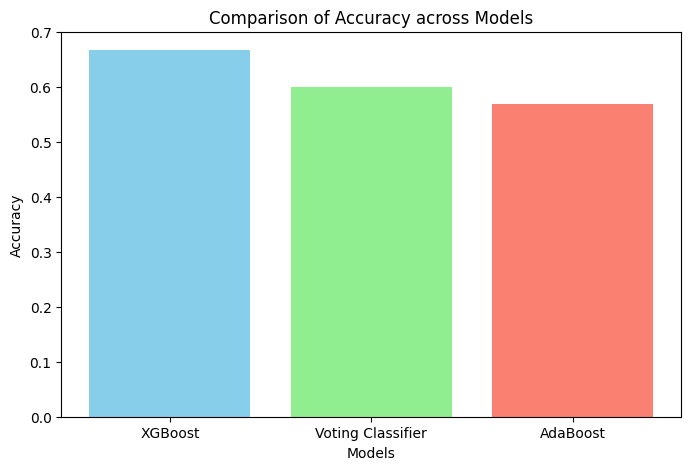

In [9]:
import matplotlib.pyplot as plt

# Define a function to plot comparison
def plot_comparison(models_metrics, metric_name):
    models = list(models_metrics.keys())
    metric_values = [metrics[metric_name] for metrics in models_metrics.values()]

    plt.figure(figsize=(8, 5))
    plt.bar(models, metric_values, color=['skyblue', 'lightgreen', 'salmon'])
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"Comparison of {metric_name} across Models")
    plt.show()

# Aggregate metrics
models_metrics = {
    "XGBoost": xgb_metrics,
    "Voting Classifier": voting_metrics,
    "AdaBoost": {"Accuracy": 0.57, "Precision": 0.35, "Recall": 0.37, "F1 Score": 0.36}  # Replace with actual metrics
}

# Plot Accuracy comparison
plot_comparison(models_metrics, "Accuracy")

